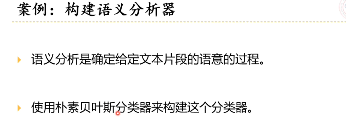

In [1]:
from nltk.corpus import movie_reviews
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy as nltk_accuracy

In [2]:
def extract_features(words):
    return dict([(word, True) for word in words])

In [3]:
fileids_pos = movie_reviews.fileids('pos')
fileids_neg = movie_reviews.fileids('neg')

features_pos = [(extract_features(movie_reviews.words(fileids=[f])), 'Positve') for f in fileids_pos]
features_neg = [(extract_features(movie_reviews.words(fileids=[f])), 'Negative') for f in fileids_neg]

print(len(features_pos), len(features_neg))

1000 1000


In [5]:
print(fileids_neg[:5])
print(fileids_pos[:5])
print(features_pos[:5])
print(features_neg[:5])

['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt']
['pos/cv000_29590.txt', 'pos/cv001_18431.txt', 'pos/cv002_15918.txt', 'pos/cv003_11664.txt', 'pos/cv004_11636.txt']
[({'films': True, 'adapted': True, 'from': True, 'comic': True, 'books': True, 'have': True, 'had': True, 'plenty': True, 'of': True, 'success': True, ',': True, 'whether': True, 'they': True, "'": True, 're': True, 'about': True, 'superheroes': True, '(': True, 'batman': True, 'superman': True, 'spawn': True, ')': True, 'or': True, 'geared': True, 'toward': True, 'kids': True, 'casper': True, 'the': True, 'arthouse': True, 'crowd': True, 'ghost': True, 'world': True, 'but': True, 'there': True, 's': True, 'never': True, 'really': True, 'been': True, 'a': True, 'book': True, 'like': True, 'hell': True, 'before': True, '.': True, 'for': True, 'starters': True, 'it': True, 'was': True, 'created': True, 'by': True, 'alan': True, 'moore': True, 'and': True, 'edd

In [6]:
threshold = 0.8
num_pos = int(threshold * len(features_pos))
num_neg = int(threshold * len(features_neg))

features_train = features_pos[:num_pos] + features_neg[:num_neg]
features_test = features_pos[num_pos:] + features_neg[num_neg:]

classicfier = NaiveBayesClassifier.train(features_train)

In [8]:
input_reviews = [
    'This is a good movie,it has veautiful pictures',
    'The expression of the move is so bad than I do not like it',
    'The framework and content of the file are very substantial',
    'The performace of the actor in the film is so bad'
]

print("\n Review prediction:")
for review in input_reviews:
    print("\n Move review: ", review)
    # Predict the sentiment of the review
    probabilites = classicfier.prob_classify(extract_features(review.split()))
    predicted_sentiment = probabilites.max()

    print("Predicted result:",predicted_sentiment)
    print("Probability:",round(probabilites.prob(predicted_sentiment),2))


 Review prediction:

 Move review:  This is a good movie,it has veautiful pictures
Predicted result: Positve
Probability: 0.56

 Move review:  The expression of the move is so bad than I do not like it
Predicted result: Negative
Probability: 0.74

 Move review:  The framework and content of the file are very substantial
Predicted result: Positve
Probability: 0.77

 Move review:  The performace of the actor in the film is so bad
Predicted result: Negative
Probability: 0.85
